# Desafío 2:  Rendimiento escolar

### Nombre: Juan Oyarce G.
### Profesor: Gabriel Tamayo
### Curso: G2

## Hito 1: Aspectos preeliminares, Aspectos computacionales

### 1.1.- Análisis de los enunciados:  Descripción del problema

- Este problema consiste en generar un modelo predictivo para estimar los promedios de nota finales de estudiantes de un colegio portugues, para ello se cuenta con una dataset con diversas variables socioeconómicas, del entorno del estudiante y hábitos de estudio, entre otros.

### 1.2.- Análisis de los enunciados:   Objetivo de la modelación

- Generar un modelo de regresión lineal multiple que permita predecir el rendimiento de los estudiantes

### 1.3.- Análisis de los enunciados:   Metodología de análisis

- La metodología consistirá en hacer una limpieza del data set, visualizar valores perdidos, recodificar las variables según instrucciones y generar variables dummies en aquellas que sea necesario, luego se procederá a visualizar histogramas de frecuencias para variables continuas y graficos de barras para variables categóricas, posteriormente se harán scaterr plot, pruebas de normalidad y mapas de correlacion, luego se plantearan los modelos econométricos saturados con todas las variables predictoras, éstos modelos se depurarán con aquellas estadísticamente significativas (pvalue<0.05), se desarrollará otro modelo y se generará un modelo de machine learning de regresión logística.

### 1.4.- Análisis de los enunciados:   Evaluación de los resultados:

- La evaluación será sobre la base del r2 y error cuadrático medio, mientras más cercano a 1 el r2 mejor será el modelo y mientras menor sea el error cuadrático medio.

### 1.5.- Aspectos computacionales: Preparación del entorno

In [85]:
# importación de las librerías tradicionales de pandas, numpys, statsmodels, scipy, seaborn y matplotlib
import numpy as np
import pandas as pd
pd.options.display.max_columns = None #instrucción para que muestre todas las columnas del dataframe sin abreviarlas
pd.options.display.max_rows = 100 #instrucción para que muestre  n  las filas del dataframe sin abreviarlas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import factor_analyzer as factor
import missingno as msngo
import warnings
warnings.filterwarnings("ignore")


# funciones propias

from functiones  import descriptives_plot

# Librerías de sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score


# Gráficos estilo seaborn
plt.style.use('seaborn')

# plt.rcParams["figure.figsize"] = (6, 3) # Tamaño gráficos
# plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [2]:
missing_values=['nulidade','sem validade','zero'] 

df= pd.read_csv("students.csv", sep='|',na_values = missing_values).drop(['Unnamed: 0'], axis = 1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,"""4""",1.0,1.0,"""3""",6.0,5.0,6,6.0
1,GP,F,"""17""",U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,"""3""",1.0,1.0,"""3""",4.0,5.0,5,6.0
2,GP,F,"""15""",U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,"""2""",2.0,3.0,"""3""",10.0,NaN,8,10.0
3,GP,F,"""15""",U,GT3,T,4.0,2.0,health,services,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,"""2""",1.0,1.0,"""5""",2.0,15.0,14,15.0
4,GP,F,NaN,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,"""2""",1.0,2.0,"""5""",4.0,6.0,10,10.0


### 1.6.- Aspectos computacionales: Limpieza del dataset y recodificación de variables

In [3]:
# eliminación de las comillas

df['age'] = df['age'].str.replace('"','')
df['goout'] = df['goout'].str.replace('"','')
df['health'] = df['health'].str.replace('"','')

In [4]:
df.dtypes #tipos de datos de las variables

school         object
sex            object
age            object
address        object
famsize        object
Pstatus        object
Medu          float64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
studytime     float64
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime      float64
goout          object
Dalc          float64
Walc          float64
health         object
absences      float64
G1            float64
G2              int64
G3            float64
dtype: object

In [5]:
columnas = np.delete(np.array(df.columns), [31]) # arreglo para extraer las columnas Object (variables categóricas)
columnas

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G3'], dtype=object)

<Figure size 432x432 with 0 Axes>

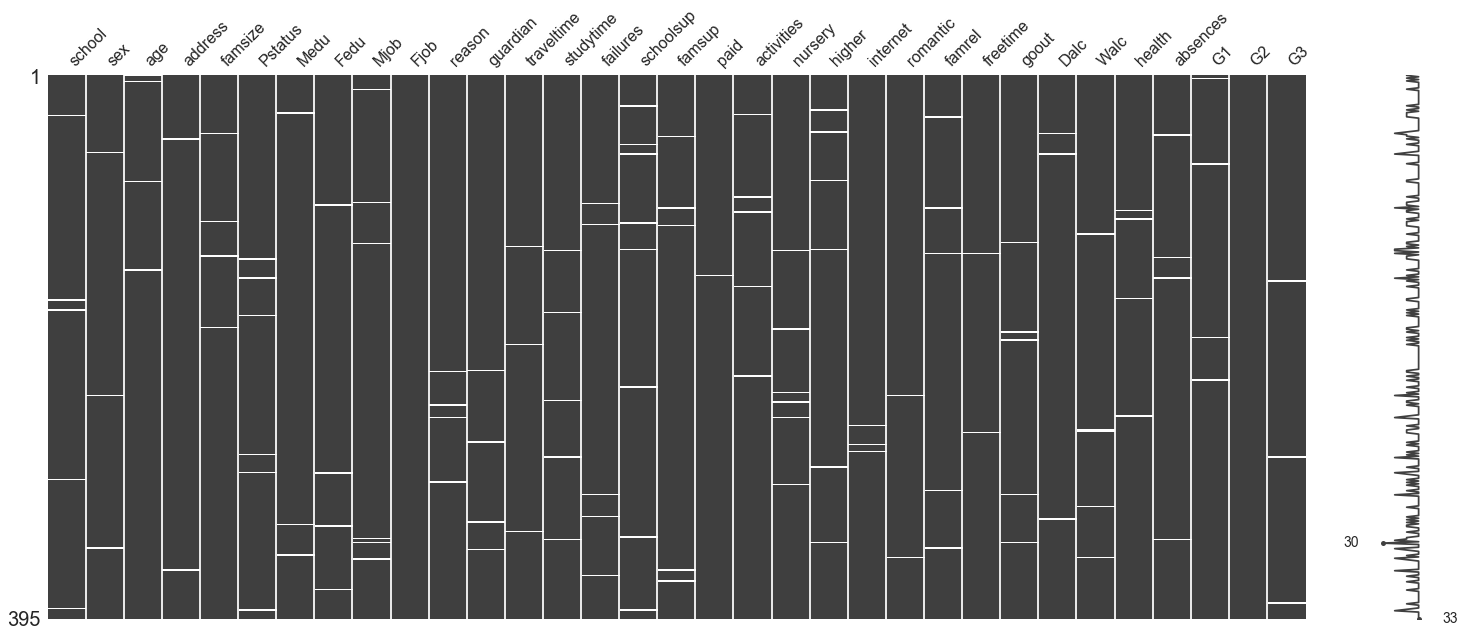

In [6]:
plt.figure(figsize=(6,6))
msngo.matrix(df);

In [7]:
df.shape

(395, 33)

In [8]:
df.isnull().sum()

school        5
sex           3
age           4
address       2
famsize       4
Pstatus       6
Medu          3
Fedu          5
Mjob          6
Fjob          0
reason        4
guardian      4
traveltime    3
studytime     5
failures      5
schoolsup     8
famsup        5
paid          1
activities    5
nursery       6
higher        6
internet      3
romantic      2
famrel        5
freetime      2
goout         5
Dalc          3
Walc          5
health        4
absences      4
G1            4
G2            0
G3            3
dtype: int64

In [9]:
df2 = df.dropna() #limpieza de los valores nulos

In [10]:
df2.shape

(284, 33)

In [11]:
print ("La cantidad de registros eliminados serán:  ", df.shape[0]-df2.shape[0])
print ("El Porcentaje de registros eliminados serán:  ", round(((df.shape[0]-df2.shape[0])/df.shape[0])*100,3), "%" )


La cantidad de registros eliminados serán:   111
El Porcentaje de registros eliminados serán:   28.101 %


In [12]:
df=df2
df.shape

(284, 33)

In [14]:
# Codificación de las variables nominales 

lst_school = list(df['school'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_sex = list(df['sex'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_address = list(df['address'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_famsize = list(df['famsize'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_pstatus = list(df['Pstatus'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_mjob = list(df['Mjob'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_fjob = list(df['Fjob'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_reason = list(df['reason'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_guardian = list(df['guardian'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_schoolsup = list(df['schoolsup'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_famsup = list(df['famsup'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_paid = list(df['paid'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_activities = list(df['activities'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_nursery = list(df['nursery'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_higher = list(df['higher'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_internet = list(df['internet'].value_counts(ascending=True).to_dict().keys())[:-1]
lst_romantic = list(df['romantic'].value_counts(ascending=True).to_dict().keys())[:-1]

In [16]:
#Generación de nuevas columnas según la categoría
for i in lst_school:
    column_name = 'school_' + i
    df[column_name] = np.where(df['school'] == i, 1, 0)
for i in lst_sex:
    column_name = 'sex_' + i
    df[column_name] = np.where(df['sex'] == i, 1, 0)
for i in lst_address:
    column_name = 'address_' + i
    df[column_name] = np.where(df['address'] == i, 1, 0)
for i in lst_famsize:
    column_name = 'famsize_' + i
    df[column_name] = np.where(df['famsize'] == i, 1, 0)
for i in lst_pstatus:
    column_name = 'pstatus' + i
    df[column_name] = np.where(df['Pstatus'] == i, 1, 0)
for i in lst_mjob:
    column_name = 'Mjob_' + i
    df[column_name] = np.where(df['Mjob'] == i, 1, 0)
for i in lst_fjob:
    column_name = 'fjob_' + i
    df[column_name] = np.where(df['Fjob'] == i, 1, 0)
for i in lst_reason:
    column_name = 'reason_' + i
    df[column_name] = np.where(df['reason'] == i, 1, 0)
for i in lst_guardian:
    column_name = 'guardian_' + i
    df[column_name] = np.where(df['guardian'] == i, 1, 0)
for i in lst_schoolsup:
    column_name = 'schoolsup_' + i
    df[column_name] = np.where(df['schoolsup'] == i, 1, 0)
for i in lst_famsup:
    column_name = 'famsup_' + i
    df[column_name] = np.where(df['famsup'] == i, 1, 0)
for i in lst_paid:
    column_name = 'paid_' + i
    df[column_name] = np.where(df['paid'] == i, 1, 0)
for i in lst_activities:
    column_name = 'activities_' + i
    df[column_name] = np.where(df['activities'] == i, 1, 0)
for i in lst_nursery:
    column_name = 'nursery_' + i
    df[column_name] = np.where(df['nursery'] == i, 1, 0)
for i in lst_higher:
    column_name = 'higher_' + i
    df[column_name] = np.where(df['higher'] == i, 1, 0)
for i in lst_internet:
    column_name = 'internet_' + i
    df[column_name] = np.where(df['internet'] == i, 1, 0)
for i in lst_romantic:
    column_name = 'romantic_' + i
    df[column_name] = np.where(df['romantic'] == i, 1, 0)

In [17]:
# se elimina el nombre de las variables originales
df = df.drop(columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

In [18]:
# reconversión a las buenas prácticas en Python
df = df.rename(columns={'Medu': 'medu', 'Fedu': 'fedu', 'Dalc': 'dalc', 'Walc': 'walc', 'G1': 'g1', 'G2': 'g2', 'G3': 'g3', 'school_MS': 'school_ms', 'sex_M': 'sex_m', 'address_R': 'address_r', 'famsize_LE3': 'famsize_le3', 'pstatusA': 'pstatusa', 'Mjob_health': 'mjob_health', 'Mjob_at_home': 'mjob_at_home', 'Mjob_teacher': 'mjob_teacher', 'Mjob_services': 'mjob_services'})

In [19]:
# transformación de las variables numéricas a int

variables_int = ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g3']
for i in variables_int:
    df[i] = df[i].astype(int)

In [20]:
df.head()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3,school_ms,sex_m,address_r,famsize_le3,pstatusa,mjob_health,mjob_at_home,mjob_teacher,mjob_services,fjob_at_home,fjob_health,fjob_teacher,fjob_services,reason_other,reason_reputation,reason_home,guardian_other,guardian_father,schoolsup_yes,famsup_no,paid_yes,activities_no,nursery_no,higher_no,internet_no,romantic_yes
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,16,2,2,1,2,0,4,4,4,1,1,3,0,12,12,11,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,5,6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0


## Hito 2: Análisis descriptivos, visualización

### 2.1  Estadísticas descriptivas e inspección general de variables

In [21]:
# ciclo para obtener las estadísticas descriptivas

for i in df:
    if len(df[i].value_counts()) > 2:
         print(df[i].describe(), "\n")
    else:
        print(df[i].value_counts('%'), "\n") 

count    284.000000
mean      16.707746
std        1.284238
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64 

count    284.000000
mean       2.774648
std        1.095409
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64 

count    284.000000
mean       2.521127
std        1.091038
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64 

count    284.000000
mean       1.475352
std        0.695334
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64 

count    284.000000
mean       2.049296
std        0.843411
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64 

count    284.000000
mean       0.334507
std  

### 2.2   Histogramas y gráficos de frecuencias

In [24]:
def plot_hist(dataframe, variable):
    """
    """
    plt.figure()
    plt.hist(df[variable], alpha=.6, color='blue')
    plt.axvline(np.mean(df[variable]),color='blue')
    plt.axvline(np.median(df[variable]),color='tomato')
    plt.title(f'Histograma - {variable}')
    plt.legend(('media', 'mediana'))
    plt.show()

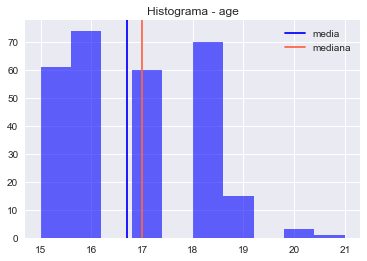

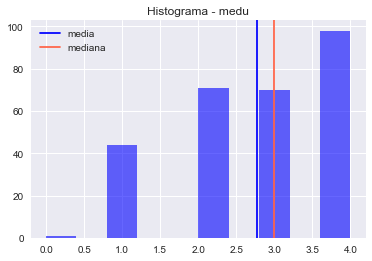

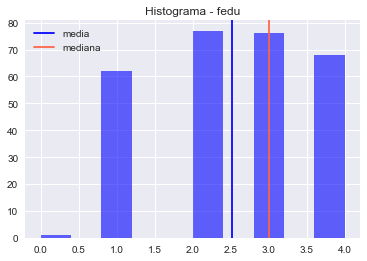

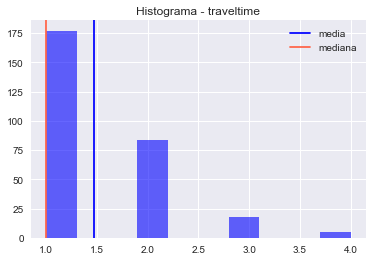

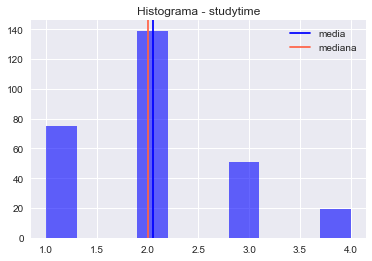

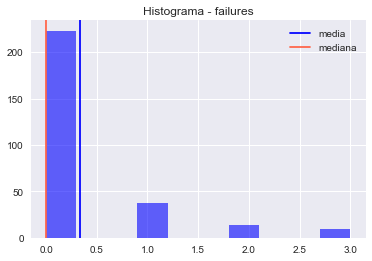

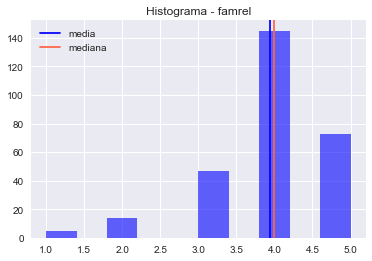

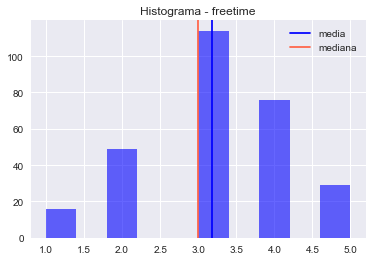

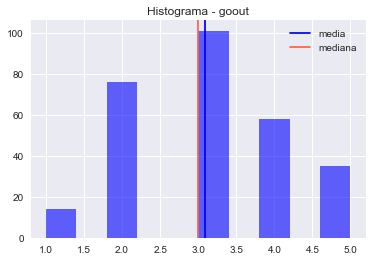

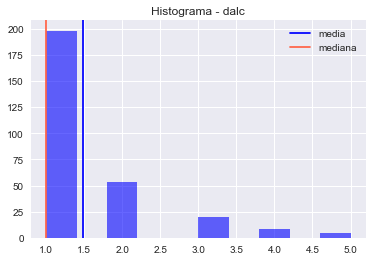

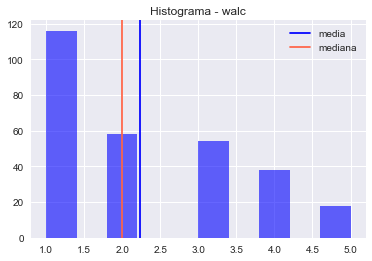

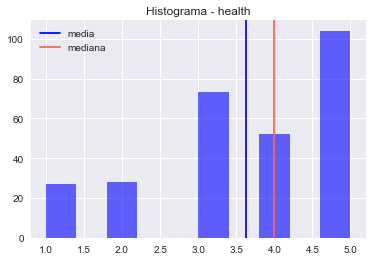

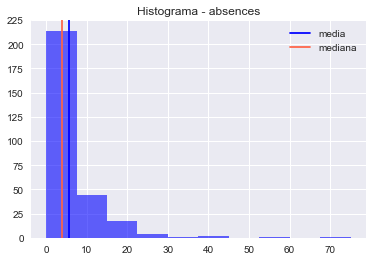

In [25]:
#función para gráficar histogramas en variables numéricas y gráficos de barras de frecuencias en variables categóricas
variables_continuas = ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences']
for i in variables_continuas:
    plot_hist(df,i)

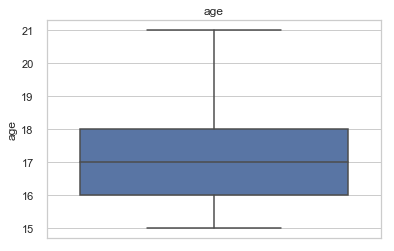

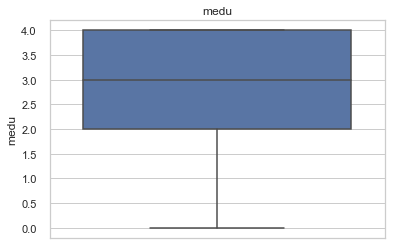

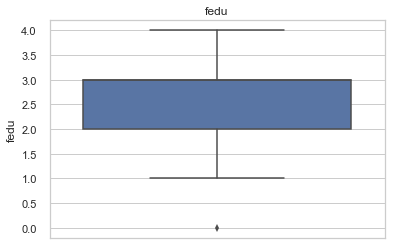

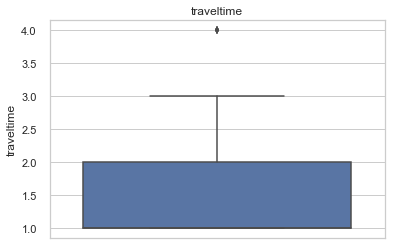

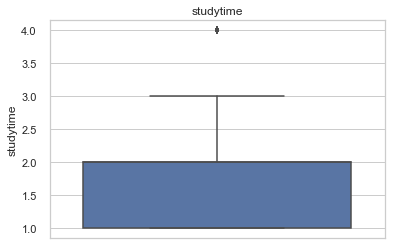

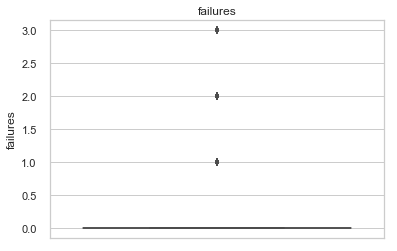

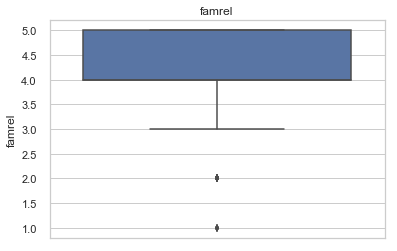

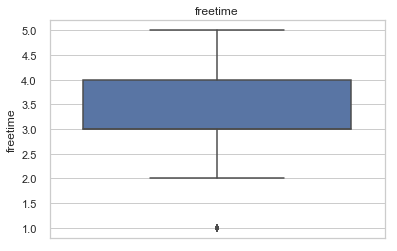

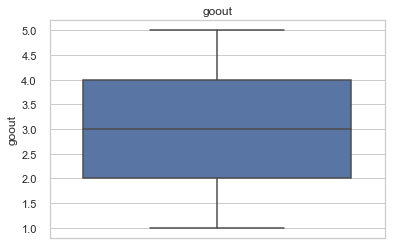

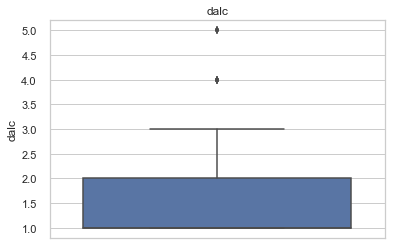

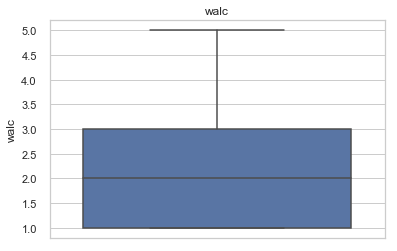

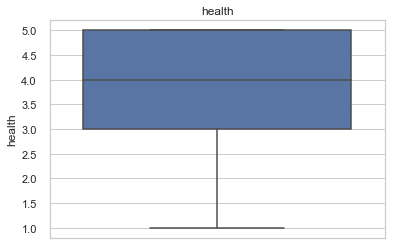

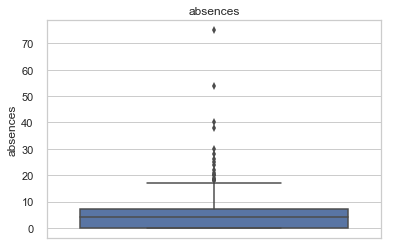

In [26]:
for i in variables_continuas:
    plt.figure()
    sns.set(style="whitegrid")
    sns.boxplot(y=df[i])
    plt.title(i)

### 2.3  ScatterPlot

In [27]:

sns.pairplot(df)

- Las variables continuas, muestra distribuciones semejantes  a la normal, pero otras no es posible afirmarlo, debido a los sesgos, cambios en simetrías y curtosis. Hay variables que tienen alto grado de dispersión y valores extremos (outliers), esto podría generar una merma al momento de correr los modelos.



### 2.4  Correlaciones y HeatMap

In [28]:
df.corr().style.background_gradient() 

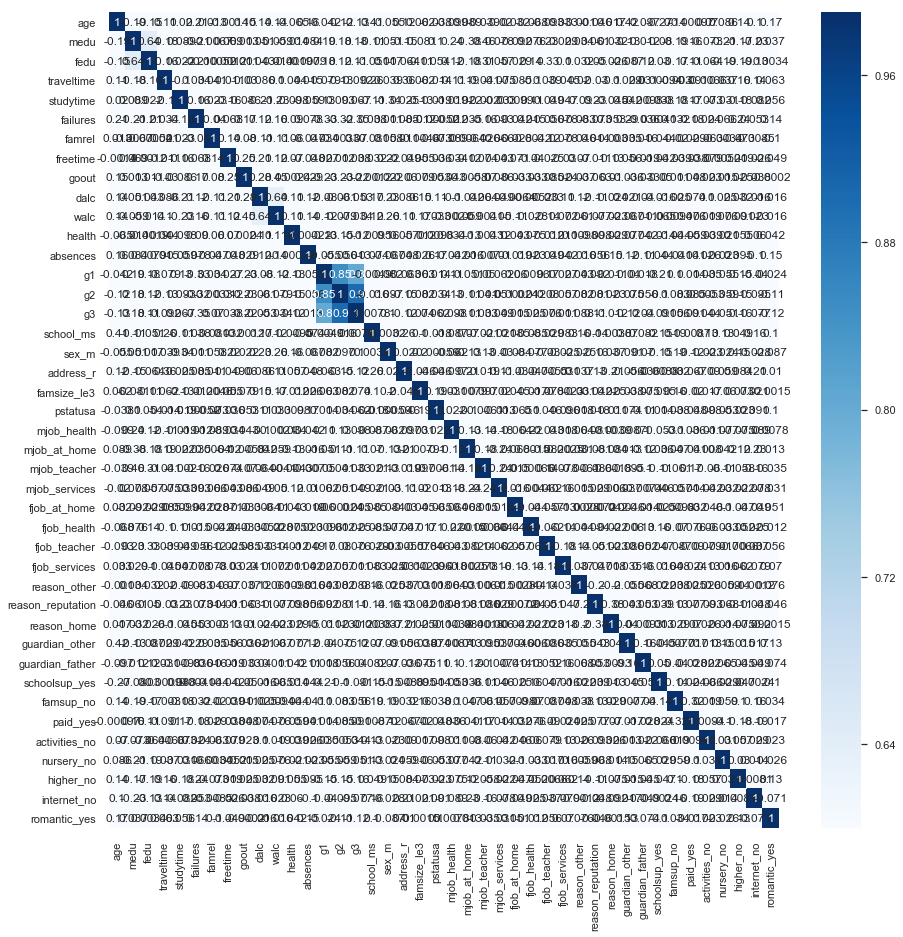

In [29]:
plt.figure(figsize=(15,15)) # aumentamos el tamaño
sns.heatmap(df.corr(), cmap='Blues',vmin=0.6, vmax=0.99, annot=True) # mapa de calor de las correlaciones mayores a 0.6

In [46]:
# Visualización de correlaciones variables objetivos
df.corr()[['g1']].sort_values(by = 'g1',ascending = False)\
.style.background_gradient()

,g1
g1,1
g2,0.848606
g3,0.803384
medu,0.189984
fedu,0.181079
fjob_teacher,0.165586
studytime,0.12602
mjob_health,0.110589
famsup_no,0.104258
reason_reputation,0.0920356


In [48]:
# Visualización de correlaciones variables objetivos
df.corr()[['g2']].sort_values(by = 'g2',ascending = False)\
.style.background_gradient()

,g2
g2,1
g3,0.902984
g1,0.848606
medu,0.179638
mjob_health,0.126979
fedu,0.123212
sex_m,0.097253
studytime,0.0929072
paid_yes,0.084792
famsup_no,0.083139


In [49]:
# Visualización de correlaciones variables objetivos
df.corr()[['g3']].sort_values(by = 'g3',ascending = False)\
.style.background_gradient()

,g3
g3,1
g2,0.902984
g1,0.803384
medu,0.180326
fedu,0.106139
reason_reputation,0.105372
sex_m,0.101995
mjob_health,0.098437
paid_yes,0.0906708
reason_other,0.0878444


In [30]:
def corr_means(dataframe, significative=0.5):
    """
    Definición: Función que extrae las correlaciones significativas a un nivel asignado
    
    Input: dataframe a correlacionar, significative (float) de 0 hasta 1.0 que indica el nivel de significancia a filtrar, por 
    defecto viene asignado con un valor superior o igual a 0.5 
    
    Outpout:Imprime las correlaciones positivas y negativas significativas
    """


    names=dataframe.corr().columns.tolist()

    for element in names:
        corr=dataframe.corr()[element].sort_values(ascending=False)
        means_values_positives= pd.Series(corr).where(lambda x  : x>=significative).dropna() 
        means_values_negatives= pd.Series(corr).where(lambda x  : x<=-significative).dropna()


        print("Correlaciones significativas positivas: ",means_values_positives,"\n","\n","Correlaciones significativas negativas: ","\n",means_values_negatives,"\n" )
        

In [31]:
corr_means(df)

Correlaciones significativas positivas:  age    1.0
Name: age, dtype: float64 
 
 Correlaciones significativas negativas:  
 Series([], Name: age, dtype: float64) 

Correlaciones significativas positivas:  medu    1.00000
fedu    0.64263
Name: medu, dtype: float64 
 
 Correlaciones significativas negativas:  
 Series([], Name: medu, dtype: float64) 

Correlaciones significativas positivas:  fedu    1.00000
medu    0.64263
Name: fedu, dtype: float64 
 
 Correlaciones significativas negativas:  
 Series([], Name: fedu, dtype: float64) 

Correlaciones significativas positivas:  traveltime    1.0
Name: traveltime, dtype: float64 
 
 Correlaciones significativas negativas:  
 Series([], Name: traveltime, dtype: float64) 

Correlaciones significativas positivas:  studytime    1.0
Name: studytime, dtype: float64 
 
 Correlaciones significativas negativas:  
 Series([], Name: studytime, dtype: float64) 

Correlaciones significativas positivas:  failures    1.0
Name: failures, dtype: float64 
 

- A pesar de la gran cantidad de variables continuas, no se aprecian correlaciones significativas entre ellas, es decir r> 0.5, sin embargo entre las variables objetivos (g1,g2 y g3) se aprecian autocorrelaciones, lo cuál es esperable.

### 2.5  Pruebas de normalidad variables numéricas

In [34]:
def test_normal_distribution(dataframe, var):
    """
    Definición:
    
    Input:
    
    Outpout:
    
    
    """
    sns.distplot(dataframe[var], fit = norm);
    plt.figure()
    stats.probplot(dataframe[var], plot = plt)
    plt.figure()
    asimetria=dataframe[var].skew().round(3)
    if asimetria >= -0.6 and asimetria<= 0.6:
        print("El Coeficiente de asimetría tiene un valor de: ", asimetria," lo que significa la curva es simétrica y se aproxima a la normal")
    else:
        print("El coeficiente de asimetría es:", asimetria, " y no se ajusta  a una distribución normal")
    curtosis=dataframe[var].kurt().round(3)
    if curtosis >= -0.6 and curtosis<= 0.6:
        print("El Coeficiente de curtosis tiene un valor de: ", curtosis,"lo que significa la curva es mesocurtica y se aproxima a la normal")
    else:
        print("El coeficiente de curtosis es:",curtosis ," y no se ajusta  a una distribución normal")
    
    

age
El Coeficiente de asimetría tiene un valor de:  0.318  lo que significa la curva es simétrica y se aproxima a la normal
El Coeficiente de curtosis tiene un valor de:  -0.592 lo que significa la curva es mesocurtica y se aproxima a la normal


-------------
medu
El Coeficiente de asimetría tiene un valor de:  -0.323  lo que significa la curva es simétrica y se aproxima a la normal
El coeficiente de curtosis es: -1.171  y no se ajusta  a una distribución normal


-------------
fedu
El Coeficiente de asimetría tiene un valor de:  -0.046  lo que significa la curva es simétrica y se aproxima a la normal
El coeficiente de curtosis es: -1.231  y no se ajusta  a una distribución normal


-------------
traveltime
El coeficiente de asimetría es: 1.454  y no se ajusta  a una distribución normal
El coeficiente de curtosis es: 1.844  y no se ajusta  a una distribución normal


-------------
studytime
El Coeficiente de asimetría tiene un valor de:  0.582  lo que significa la curva es simétrica y

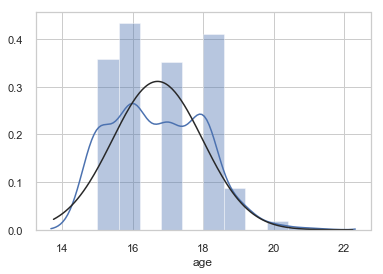

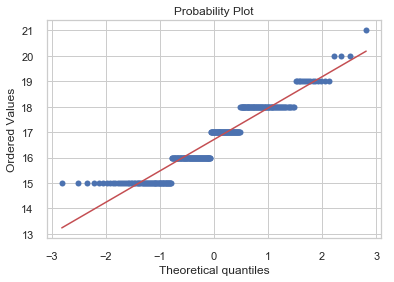

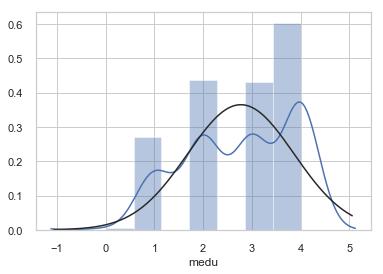

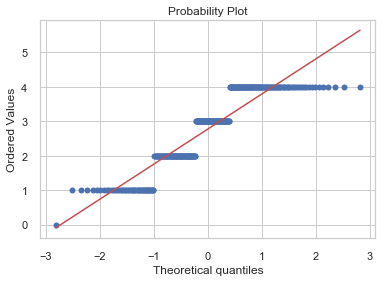

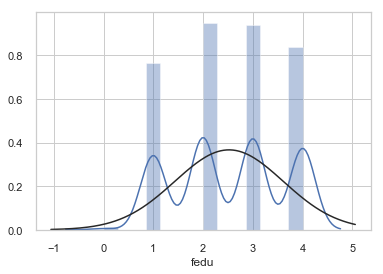

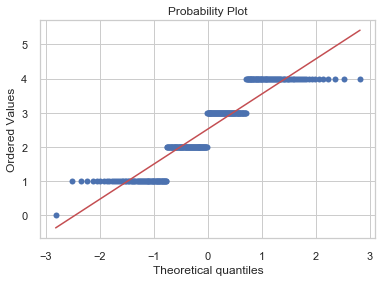

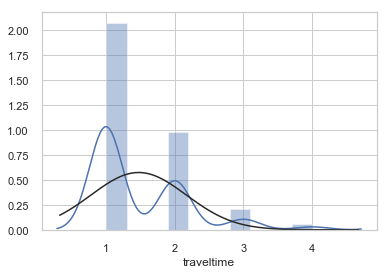

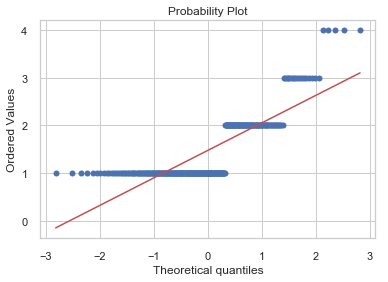

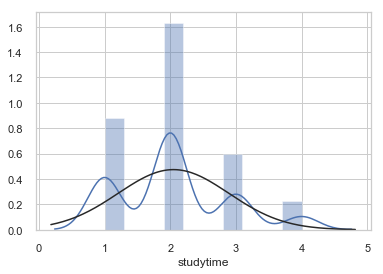

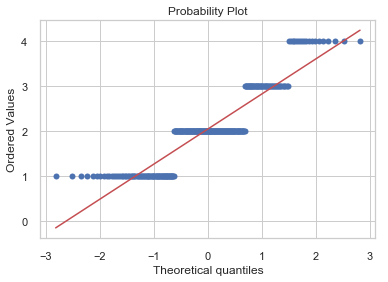

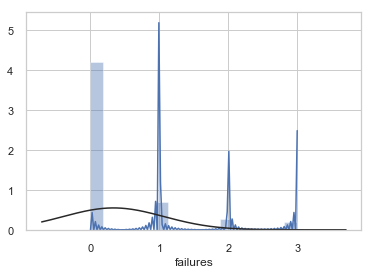

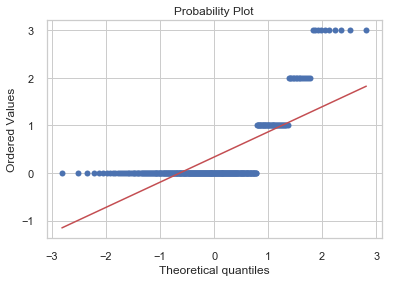

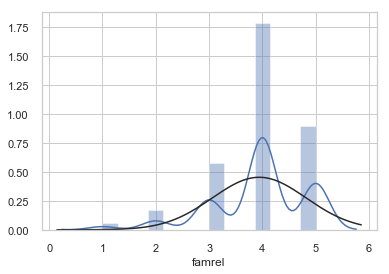

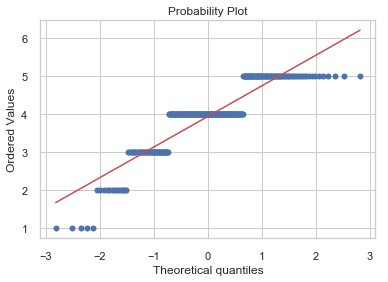

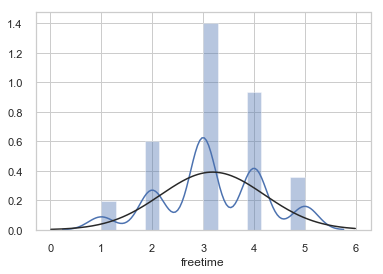

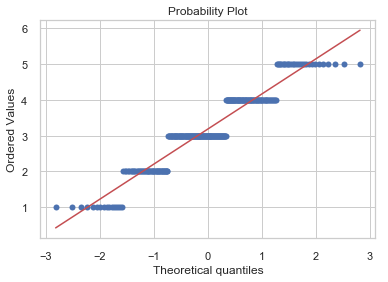

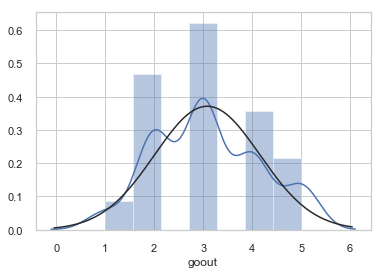

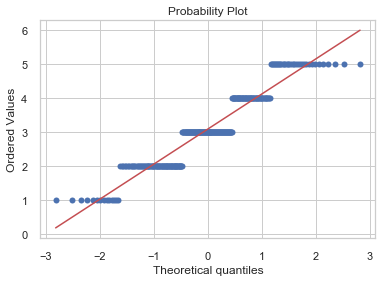

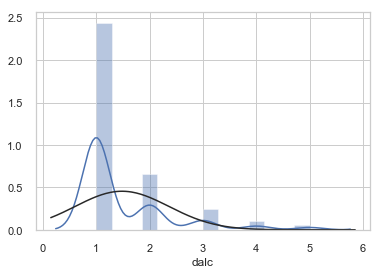

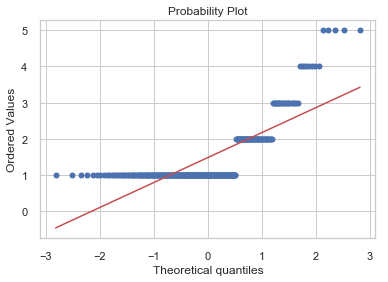

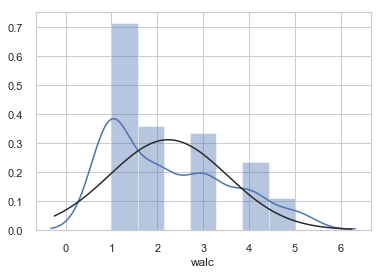

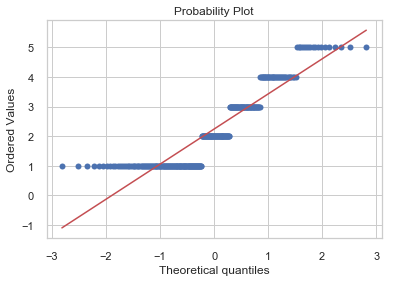

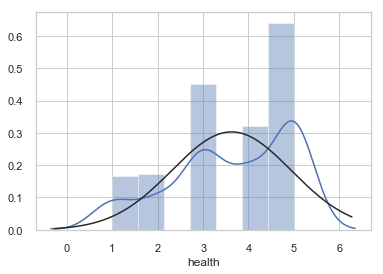

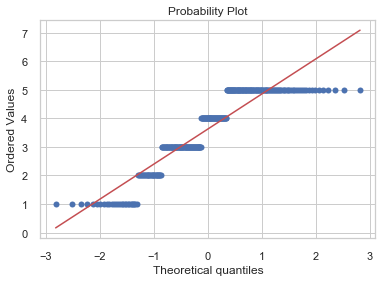

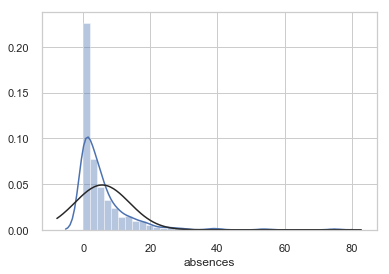

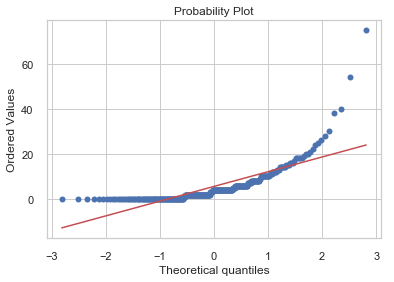

<Figure size 432x288 with 0 Axes>

In [35]:
variables_continuas = ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences']

for i in variables_continuas:
    print(i)
    test_normal_distribution(df,i)
    print('\n')
    print('-------------')

- Una cantidad media de variables continuas se pueden aproximar a una distribución normal, el resto dificilmente se puede adecuar, por lo que podría ser una buena estrategia reescalar log, en caso de que los modelos seán muy poco explicativos

## Hito 3: Modelación descriptiva

###  3.1 Modelación saturada G1

In [50]:
model_g1_1 = smf.ols('g1 ~ age + medu + fedu + traveltime + studytime + failures + famrel + freetime + goout + dalc + walc+ health + absences + school_ms + sex_m+ address_r + famsize_le3 + pstatusa + mjob_health + mjob_at_home+ mjob_teacher + mjob_services + fjob_at_home+ fjob_health + fjob_teacher+ fjob_services + reason_other + reason_reputation + reason_home+ guardian_other + guardian_father+ schoolsup_yes + famsup_no + paid_yes + activities_no + nursery_no + higher_no + internet_no + romantic_yes', data=df).fit()
model_g1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g1   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     3.090
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           5.75e-08
Time:                        21:38:36   Log-Likelihood:                -683.63
No. Observations:                 284   AIC:                             1447.
Df Residuals:                     244   BIC:                             1593.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.8430      3.407      2.302      0.022       1.133      14.553
age                   0.0772      0.185      0.418      0.677      -0.287       0.441
medu                  0.1809      0.282      0.642      0.521      -0.374       0.736
fedu                  0.1527      0.236      0.646      0.519      -0.313       0.618
traveltime           -0.0215      0.291     -0.074      0.941      -0.594       0.551
studytime             0.5074      0.245      2.068      0.040       0.024       0.991
failures             -1.1235      0.282     -3.977      0.000      -1.680      -0.567
famrel                0.1449      0.213      0.681      0.497      -0.274       0.564
freetime              0.3778      0.193      1.959      0.051      -0.002       0.758
goout                -0.7691      0.199     -3.873      0.000      -1.160      -0.378
dalc                 -0.0730      0.286     -0.255      0.799      -0.636       0.490
walc                  0.1585      0.210      0.756      0.451      -0.255       0.572
health               -0.2918      0.142     -2.062      0.040      -0.571      -0.013
absences             -0.0048      0.024     -0.196      0.845      -0.053       0.043
school_ms            -0.3886      0.666     -0.583      0.560      -1.701       0.924
sex_m                 0.7631      0.432      1.768      0.078      -0.087       1.613
address_r            -0.0205      0.487     -0.042      0.966      -0.980       0.939
famsize_le3           0.3125      0.440      0.710      0.478      -0.555       1.180
pstatusa              0.1872      0.650      0.288      0.774      -1.094       1.468
mjob_health           1.5674      0.790      1.983      0.048       0.011       3.124
mjob_at_home          0.5423      0.598      0.907      0.365      -0.636       1.720
mjob_teacher         -0.5427      0.703     -0.772      0.441      -1.928       0.843
mjob_services         0.9336      0.522      1.788      0.075      -0.095       1.962
fjob_at_home          1.4765      0.984      1.500      0.135      -0.462       3.415
fjob_health           0.4193      0.952      0.440      0.660      -1.456       2.294
fjob_teacher          2.2932      0.796      2.882      0.004       0.726       3.860
fjob_services         0.6241      0.471      1.326      0.186      -0.303       1.551
reason_other          0.1005      0.675      0.149      0.882      -1.230       1.431
reason_reputation     0.5312      0.487      1.090      0.277      -0.429       1.491
reason_home           0.3701      0.473      0.783      0.434      -0.561       1.301
guardian_other        0.0880      0.782      0.113      0.910      -1.453       1.629
guardian_father      -0.2087      0.479     -0.436      0.663      -1.152       0.734
schoolsup_yes        -1.7737      0.564     -3.145      0.002      -2.885

###  3.2 Modelación depurada G1

In [53]:
pvalues = model_g1_1.pvalues
print ('Las siguientes variables son estadísticamente significativas: ')        
means_values= pd.Series(pvalues).where(lambda x : x<0.025).dropna() 
print(means_values)



Las siguientes variables son estadísticamente significativas: 
Intercept        0.022167
failures         0.000092
goout            0.000138
fjob_teacher     0.004300
schoolsup_yes    0.001865
famsup_no        0.015118
dtype: float64


In [66]:
model_g1_2 = smf.ols('g1 ~ failures + goout + fjob_teacher + schoolsup_yes + famsup_no', data=df).fit()
model_g1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     15.20
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           3.30e-13
Time:                        21:47:28   Log-Likelihood:                -706.29
No. Observations:                 284   AIC:                             1425.
Df Residuals:                     278   BIC:                             1446.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9071      0.568     22.742      0.000      11.790      14.024
failures         -1.3189      0.243     -5.431      0.000      -1.797      -0.841
goout            -0.5403      0.165     -3.268      0.001      -0.866      -0.215
fjob_teacher      1.9143      0.673      2.846      0.005       0.590       3.238
schoolsup_yes    -1.9953      0.519     -3.846      0.000      -3.017      -0.974
famsup_no         0.6692      0.363      1.842      0.067      -0.046       1.384
==============================================================================
Omnibus:                        6.186   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.235
Skew:                           0.149   Prob(JB):                        0.120
Kurtosis:                       2.481   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  3.3 Modelación saturada G2

In [67]:
model_g2_1 = smf.ols('g2 ~ age + medu + fedu + traveltime + studytime + failures + famrel + freetime + goout + dalc + walc + health + absences + school_ms + sex_m + address_r + famsize_le3 + pstatusa + mjob_health + mjob_at_home+ mjob_teacher + mjob_services + fjob_at_home + fjob_health + fjob_teacher + fjob_services + reason_other + reason_reputation + reason_home + guardian_other + guardian_father + schoolsup_yes + famsup_no + paid_yes + activities_no + nursery_no + higher_no + internet_no + romantic_yes', data=df).fit()
model_g2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g2   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     2.693
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           2.14e-06
Time:                        21:50:53   Log-Likelihood:                -729.98
No. Observations:                 284   AIC:                             1540.
Df Residuals:                     244   BIC:                             1686.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.3320      4.011      3.075      0.002       4.432      20.232
age                  -0.0696      0.218     -0.320      0.749      -0.498       0.359
medu                  0.3221      0.332      0.971      0.332      -0.331       0.975
fedu                 -0.1232      0.278     -0.443      0.658      -0.671       0.425
traveltime           -0.2211      0.342     -0.646      0.519      -0.896       0.453
studytime             0.4171      0.289      1.444      0.150      -0.152       0.986
failures             -1.1293      0.333     -3.396      0.001      -1.784      -0.474
famrel                0.0282      0.251      0.112      0.911      -0.466       0.522
freetime              0.3319      0.227      1.462      0.145      -0.115       0.779
goout                -0.9655      0.234     -4.130      0.000      -1.426      -0.505
dalc                 -0.2099      0.337     -0.624      0.533      -0.873       0.453
walc                  0.3593      0.247      1.455      0.147      -0.127       0.846
health               -0.3901      0.167     -2.342      0.020      -0.718      -0.062
absences             -0.0079      0.029     -0.274      0.785      -0.064       0.049
school_ms             0.2397      0.785      0.305      0.760      -1.306       1.785
sex_m                 0.8885      0.508      1.748      0.082      -0.112       1.889
address_r            -0.7540      0.573     -1.315      0.190      -1.883       0.375
famsize_le3           0.4639      0.518      0.895      0.372      -0.557       1.485
pstatusa              0.5952      0.766      0.777      0.438      -0.913       2.103
mjob_health           1.3481      0.930      1.449      0.149      -0.485       3.181
mjob_at_home          0.0448      0.704      0.064      0.949      -1.342       1.432
mjob_teacher         -0.9147      0.828     -1.105      0.270      -2.546       0.716
mjob_services         0.5723      0.615      0.931      0.353      -0.639       1.783
fjob_at_home          0.6572      1.159      0.567      0.571      -1.625       2.940
fjob_health           0.2775      1.121      0.248      0.805      -1.930       2.485
fjob_teacher          1.6963      0.937      1.811      0.071      -0.149       3.541
fjob_services         0.9032      0.554      1.630      0.104      -0.188       1.994
reason_other          0.7999      0.795      1.006      0.315      -0.766       2.366
reason_reputation     0.6478      0.574      1.129      0.260      -0.482       1.778
reason_home           0.4672      0.556      0.840      0.402      -0.629       1.563
guardian_other       -0.0022      0.921     -0.002      0.998      -1.816       1.811
guardian_father      -0.0425      0.564     -0.075      0.940      -1.152       1.067
schoolsup_yes        -1.0396      0.664     -1.566      0.119      -2.347

###  3.4 Modelación depurada G2

In [68]:
pvalues = model_g2_1.pvalues
print ('Las siguientes variables son estadísticamente significativas: ')        
means_values= pd.Series(pvalues).where(lambda x : x<0.025).dropna() 
print(means_values)

Las siguientes variables son estadísticamente significativas: 
Intercept    0.002346
failures     0.000799
goout        0.000050
health       0.020006
dtype: float64


In [69]:
model_g2_2 = smf.ols('g2 ~ failures + goout + health', data=df).fit()
model_g2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g2   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     16.82
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           4.48e-10
Time:                        21:51:43   Log-Likelihood:                -757.28
No. Observations:                 284   AIC:                             1523.
Df Residuals:                     280   BIC:                             1537.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4578      0.854     16.923      0.000      12.776      16.140
failures      -1.4542      0.290     -5.008      0.000      -2.026      -0.883
goout         -0.6503      0.196     -3.311      0.001      -1.037      -0.264
health        -0.3653      0.159     -2.302      0.022      -0.678      -0.053
==============================================================================
Omnibus:                       13.056   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.434
Skew:                          -0.443   Prob(JB):                     0.000734
Kurtosis:                       3.660   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  3.5 Modelación saturada G3

In [70]:
model_g3_1 = smf.ols('g3 ~ age + medu + fedu + traveltime + studytime + failures + famrel + freetime + goout + dalc + walc + health + absences + school_ms + sex_m+ address_r + famsize_le3 + pstatusa + mjob_health + mjob_at_home + mjob_teacher + mjob_services + fjob_at_home + fjob_health + fjob_teacher + fjob_services + reason_other + reason_reputation + reason_home + guardian_other + guardian_father + schoolsup_yes + famsup_no + paid_yes + activities_no + nursery_no + higher_no + internet_no + romantic_yes', data=df).fit()
model_g3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g3   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     2.831
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           6.14e-07
Time:                        21:52:08   Log-Likelihood:                -780.76
No. Observations:                 284   AIC:                             1642.
Df Residuals:                     244   BIC:                             1787.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.5320      4.796      2.404      0.017       2.085      20.979
age                  -0.1608      0.260     -0.618      0.537      -0.673       0.352
medu                  0.5017      0.397      1.265      0.207      -0.279       1.283
fedu                 -0.3060      0.333     -0.920      0.358      -0.961       0.349
traveltime           -0.1333      0.409     -0.326      0.745      -0.940       0.673
studytime             0.3779      0.345      1.094      0.275      -0.302       1.058
failures             -1.4767      0.398     -3.713      0.000      -2.260      -0.693
famrel                0.4857      0.300      1.621      0.106      -0.105       1.076
freetime              0.4721      0.271      1.739      0.083      -0.063       1.007
goout                -1.2396      0.280     -4.434      0.000      -1.790      -0.689
dalc                 -0.5493      0.402     -1.365      0.174      -1.342       0.243
walc                  0.7566      0.295      2.562      0.011       0.175       1.338
health               -0.3936      0.199     -1.976      0.049      -0.786      -0.001
absences              0.0336      0.034      0.977      0.329      -0.034       0.101
school_ms             0.9206      0.938      0.981      0.327      -0.927       2.769
sex_m                 1.0108      0.608      1.663      0.098      -0.186       2.208
address_r            -0.8873      0.686     -1.294      0.197      -2.238       0.463
famsize_le3           0.3597      0.620      0.580      0.562      -0.861       1.580
pstatusa              1.0103      0.916      1.103      0.271      -0.793       2.814
mjob_health           1.0952      1.113      0.984      0.326      -1.096       3.287
mjob_at_home         -0.2651      0.842     -0.315      0.753      -1.924       1.393
mjob_teacher         -1.3098      0.990     -1.323      0.187      -3.260       0.640
mjob_services         0.4771      0.735      0.649      0.517      -0.971       1.925
fjob_at_home          1.4023      1.386      1.012      0.313      -1.327       4.132
fjob_health           0.7621      1.340      0.569      0.570      -1.878       3.402
fjob_teacher          2.1982      1.120      1.963      0.051      -0.008       4.404
fjob_services         0.8480      0.663      1.280      0.202      -0.457       2.153
reason_other          0.9620      0.951      1.012      0.313      -0.911       2.835
reason_reputation     0.9431      0.686      1.375      0.171      -0.408       2.295
reason_home           0.2428      0.665      0.365      0.715      -1.067       1.553
guardian_other       -0.6460      1.101     -0.587      0.558      -2.815       1.523
guardian_father      -0.2893      0.674     -0.429      0.668      -1.617       1.038
schoolsup_yes        -1.0615      0.794     -1.337      0.182      -2.625

###  3.6 Modelación depurada G3

In [71]:
pvalues = model_g3_1.pvalues
print ('Las siguientes variables son estadísticamente significativas: ')        
means_values= pd.Series(pvalues).where(lambda x : x<0.025).dropna() 
print(means_values)

Las siguientes variables son estadísticamente significativas: 
Intercept    0.016942
failures     0.000254
goout        0.000014
walc         0.011020
dtype: float64


In [72]:
model_g3_1 = smf.ols('g3 ~ failures + goout', data=df).fit()
model_g3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g3   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     24.26
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.91e-10
Time:                        21:52:37   Log-Likelihood:                -811.15
No. Observations:                 284   AIC:                             1628.
Df Residuals:                     281   BIC:                             1639.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2692      0.763     17.387      0.000      11.767      14.772
failures      -1.9836      0.349     -5.685      0.000      -2.670      -1.297
goout         -0.7169      0.237     -3.026      0.003      -1.183      -0.251
==============================================================================
Omnibus:                       23.948   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.829
Skew:                          -0.692   Prob(JB):                     9.06e-07
Kurtosis:                       3.659   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones generales de los modelos:

- Los 3 modelos propuestos son estadísticamente significativos de acuerdo a sus valores f<0.05

- Los coeficientes varían bastante y los modelos se construyen con una gran cantidad de variables, casí 50, tras la depuración, disminuyen a menos de 5 variables, lo cuál reduce el promedio de error cuadrático, pero asimismo disminuye el poder explicativo o r2 ajustado.

- En promedio los 3 modelos para predecir g1, g2 y g3 presentan un r2 ajustado cercano a 0.2 lo que indica que en general, sirven como aproximaciones, pero no son definitivos.

- Para mejorar la modelación, se puede intentar reescalar las variables o remuestrear, pero por efectos de tiempo, no se realizará dicha mejora.



## Hito 4: Modelación predictiva

### 4.1  Análisis Factorial variables ambientales del estudiante

In [73]:
X = df[['famrel', 'freetime', 'goout', 'dalc', 'walc', 'health']].copy() #abstracción de las variables a factorizar

In [79]:
factor.calculate_kmo(X) # test de KMO

(array([0.50173343, 0.57692329, 0.61683967, 0.58664172, 0.5554092 ,
        0.59265861]), 0.5767240731164598)

In [80]:
factor.calculate_bartlett_sphericity(X) # test de Esfericidad de Bartlett

(264.4978629665061, 6.038167101270236e-48)

- Se rechaza la opción del análisis factorial debido a que si bien el test de esfericidad es aceptable, los valores de kmo son  promedio 0.58, siendo inferior a 0.7 por lo cuál los factores podrían no ser explicativos o no estar correlacionados

### 4.2  Segmentación de datos

In [129]:
X = df[['failures', 'goout']].copy() # se consideran las variables significativas del modelo depurado
y = df['g3'].copy()

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1986)

### 4.3  Modelo 1 normalizado con intercepto

In [138]:
depure_model_norm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
depure_model_norm.fit(X_train, y_train)
depure_model_yhat_norm = depure_model_norm.predict(X_test)

In [140]:
# Función para generar reportes

def report_scores(yhat, y_test):
    """
    Definición: Función que genere reportes de un modelo sobre un conjunto de datos predichos y de datos por validar
    Input: 2 vectores que contienen los datos predichos y los datos por validar
    Outpout: la función imprime el Error Cuadrático Promedio y R2.
    """
    m2_mse = mean_squared_error(y_test, yhat).round(0)
    m2_r2 = r2_score(y_test, yhat).round(2)
    print('Error Cuadrático Medio Promedio:', m2_mse)
    print('R2:', m2_r2)

In [158]:
report_scores(depure_model_yhat_norm, y_test)

Error Cuadrático Medio Promedio: 18.0
R2: 0.13


### 4.4  Modelo 2 normalizado sin intercepto

In [133]:
depure2_model_norm = linear_model.LinearRegression(fit_intercept=True, normalize=False)
depure2_model_norm.fit(X_train, y_train)
depure2_model_yhat_norm = depure2_model_norm.predict(X_test)

In [159]:
report_scores(depure2_model_yhat_norm, y_test)

Error Cuadrático Medio Promedio: 18.0
R2: 0.13


### 4.5  Modelo 3 no normalizado con intercepto

In [147]:
depure3_model_norm = linear_model.LinearRegression(fit_intercept=False, normalize=False)
depure3_model_norm.fit(X_train, y_train)
depure3_model_yhat_norm = depure3_model_norm.predict(X_test)

In [165]:
report_scores(depure3_model_yhat_norm, y_test) # revisar el r2, al correrlo por segunda vez se desconfiguró pero inicialmente era 0.44

Error Cuadrático Medio Promedio: 44.0
R2: -1.15


- Se puede apreciar que los 3 modelos presentan valores bajos de explicación, el r2 del último modelo, que se apróxima a 0.44 es mejor que el resto, pero el error cuádratico medio es mayor, se recomienda implementar con fines explicativos, ya que los 3 modelos tienen bajo valor predictivo.